In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss
#import seaborn as sns
#sns.set_style("white")

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

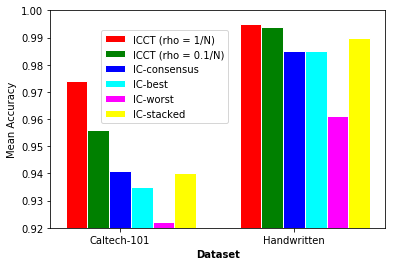

In [29]:
# set width of bar
barWidth = 0.25

MV_h = [0.974, 0.995]
MV_l = [0.956, 0.994]
BL = [0.941, 0.985]
SV_b = [0.935, 0.985]
SV_w = [0.922, 0.961]
BaseL = [0.94, 0.99]

# Set position of bar on X axis
r1 = 2*np.arange(len(MV_h))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
 
# Make the plot
plt.bar(r1, MV_h, color='r', width=barWidth, edgecolor='white', label='ICCT (rho = 1/N)')
plt.bar(r2, MV_l, color='g', width=barWidth, edgecolor='white', label='ICCT (rho = 0.1/N)')
plt.bar(r3, BL, color='b', width=barWidth, edgecolor='white', label='IC-consensus')
plt.bar(r4, SV_b, color='cyan', width=barWidth, edgecolor='white', label='IC-best')
plt.bar(r5, SV_w, color='magenta', width=barWidth, edgecolor='white', label='IC-worst')
plt.bar(r6, BaseL, color='yellow', width=barWidth, edgecolor='white', label='IC-stacked')
 
# Add xticks on the middle of the group bars
plt.xlabel('Dataset', fontweight='bold')
plt.xticks([2*r + 0.25 + barWidth for r in range(len(MV_h))], ['Caltech-101', 'Handwritten'])
plt.ylim([0.92, 1.0])
plt.ylabel('Mean Accuracy')
 
# Create legend & Show graphic
plt.legend(loc=(0.15,0.48))
plt.show()

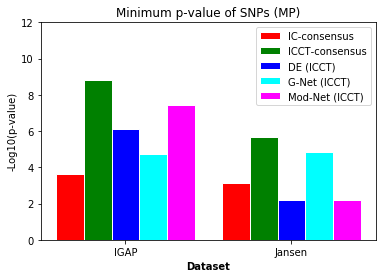

In [56]:
# set width of bar
barWidth = 0.25

ILB = -np.log10([2.4e-4, 7.2e-4])
ICCT = -np.log10([1.5e-9, 2.2e-6])
DE = -np.log10([7.7e-7, 6.03e-3])
SubNet = -np.log10([1.9e-5, 1.46e-5])
Agg = -np.log10([3.86e-8, 6.6e-3])

# Set position of bar on X axis
r1 = 1.5*np.arange(len(ILB))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, ILB, color='r', width=barWidth, edgecolor='white', label='IC-consensus')
plt.bar(r2, ICCT, color='g', width=barWidth, edgecolor='white', label='ICCT-consensus')
plt.bar(r3, DE, color='b', width=barWidth, edgecolor='white', label='DE (ICCT)')
plt.bar(r4, SubNet, color='cyan', width=barWidth, edgecolor='white', label='G-Net (ICCT)')
plt.bar(r5, Agg, color='magenta', width=barWidth, edgecolor='white', label='Mod-Net (ICCT)')
 
# Add xticks on the middle of the group bars
plt.xlabel('Dataset', fontweight='bold')
plt.xticks([1.5*r + 0.25 + barWidth for r in range(len(ILB))], ['IGAP', 'Jansen'])
plt.ylim([0, 12])
plt.ylabel('-Log10(p-value)')
 
# Create legend & Show graphic
plt.legend(loc="best")
plt.title('Minimum p-value of SNPs (MP)')
plt.show()

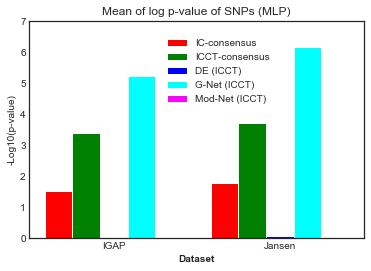

In [67]:
# set width of bar
barWidth = 0.25

ILB = -np.log10([0.03, 0.016])
ICCT = -np.log10([4e-4, 2e-4])
DE = -np.log10([0.89, 0.86])
SubNet = -np.log10([6e-6, 7e-7])
Agg = -np.log10([0.89, 0.89])

# Set position of bar on X axis
r1 = 1.5*np.arange(len(ILB))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, ILB, color='r', width=barWidth, edgecolor='white', label='IC-consensus')
plt.bar(r2, ICCT, color='g', width=barWidth, edgecolor='white', label='ICCT-consensus')
plt.bar(r3, DE, color='b', width=barWidth, edgecolor='white', label='DE (ICCT)')
plt.bar(r4, SubNet, color='cyan', width=barWidth, edgecolor='white', label='G-Net (ICCT)')
plt.bar(r5, Agg, color='magenta', width=barWidth, edgecolor='white', label='Mod-Net (ICCT)')
 
# Add xticks on the middle of the group bars
plt.xlabel('Dataset', fontweight='bold')
plt.xticks([1.5*r + 0.25 + barWidth for r in range(len(ILB))], ['IGAP', 'Jansen'])
plt.ylim([0, 7])
plt.ylabel('-Log10(p-value)')
 
# Create legend & Show graphic
#plt.legend(loc="best")
plt.legend(loc=(0.4,0.6))
plt.title('Mean of log p-value of SNPs (MLP)')
plt.show()

In [21]:
bla = 6
print(bin(bla))
print(bin(bla>>2))

0b110
0b1


In [6]:
def ProcessData(X):
    X = X.drop(['GeneID'], axis = 1)
    X.head()
    X = X.fillna(0)
    X2 = X.abs()
    X_normed = X.values / X2.values.max(axis=0)
    return(X_normed)

In [13]:
#calculate spearman correlation between network features and their ranks 
# SubNet 
X1 = pd.read_csv('./amp_ad_agg_feature_set.csv')
X3 = pd.read_csv('./amp_ad_subNet_feature_set.csv')
GeneId = X1['GeneID']
X1 = X1.drop(['GeneID'], axis = 1)
X3 = X3.drop(['GeneID'], axis = 1)
X1.head()

,aggregateCBEblueCBEdegree,aggregateCBEblueCBEauthority_score,aggregateCBEblueCBEcloseness,aggregateCBEblueCBEeccentricity,aggregateCBEblueCBEcentr_betw,aggregateCBEblueCBEpagerank,aggregateCBEbrownCBEdegree,aggregateCBEbrownCBEauthority_score,aggregateCBEbrownCBEcloseness,aggregateCBEbrownCBEeccentricity,...,aggregateTCXturquoiseTCXcloseness,aggregateTCXturquoiseTCXeccentricity,aggregateTCXturquoiseTCXcentr_betw,aggregateTCXturquoiseTCXpagerank,aggregateTCXyellowTCXdegree,aggregateTCXyellowTCXauthority_score,aggregateTCXyellowTCXcloseness,aggregateTCXyellowTCXeccentricity,aggregateTCXyellowTCXcentr_betw,aggregateTCXyellowTCXpagerank
0,0,0.000000,0.000000e+00,0,0.000000,0.000000,0,0.0,0.0,0,...,0.000000,0,0.000000,0.000000,0,0.0,0.0,0,0.0,0.0
1,0,0.000000,0.000000e+00,0,0.000000,0.000000,0,0.0,0.0,0,...,0.000000,0,0.000000,0.000000,0,0.0,0.0,0,0.0,0.0
2,7,0.002168,5.944455e-07,13,9447.072584,0.000393,0,0.0,0.0,0,...,0.000000,0,0.000000,0.000000,0,0.0,0.0,0,0.0,0.0
3,0,0.000000,0.000000e+00,0,0.000000,0.000000,0,0.0,0.0,0,...,0.000007,6,1329.080162,0.001071,0,0.0,0.0,0,0.0,0.0
4,0,0.000000,0.000000e+00,0,0.000000,0.000000,0,0.0,0.0,0,...,0.000007,6,1316.848500,0.001115,0,0.0,0.0,0,0.0,0.0


In [10]:
#Load prediction dataset 
df = pd.read_csv('EC2_ICCT_subNet_de_agg_probs.csv')
GeneId = df['Gene']
df.head()

,Unnamed: 0,Gene,Y0h,Y0l,Y1h,Y1l,Y3h,Y3l
0,0,ENSG00000000003,0.240105,9.997225e-01,1.234691e-10,6.733560e-12,0.005367,2.949255e-07
1,1,ENSG00000000419,0.665309,2.850016e-01,1.229701e-08,2.012001e-15,0.000050,2.377142e-11
2,2,ENSG00000000457,0.665282,2.849000e-01,2.238065e-12,2.984028e-11,0.025684,7.106794e-05
3,3,ENSG00000000938,0.000953,7.429655e-07,7.256187e-08,3.230653e-06,0.122708,9.286597e-01
4,4,ENSG00000000971,0.016454,1.021360e-01,4.711436e-08,2.361356e-07,0.088079,7.580288e-01


In [39]:
X1_c = []
X3_c = []

for i in range(len(X1.columns)):
    X1_c += [(ss.spearmanr(X1[X1.columns[i]],df['Y1l'])[0])]
    
for i in range(len(X3.columns)):
    X3_c += [(ss.spearmanr(X3[X3.columns[i]],df['Y3l'])[0])]
    
    

In [45]:
df_1 = pd.DataFrame(data = {'Feature':X1.columns.str.slice(start=9),'Correlation':X1_c})
df_3 = pd.DataFrame(data = {'Feature':X3.columns,'Correlation':X3_c})

df_1 = df_1.iloc[(-df_1['Correlation'].abs()).argsort()]
df_3 = df_3.iloc[(-df_3['Correlation'].abs()).argsort()]


In [46]:
df_1.to_csv('./PaperFigs/ModNet_featureRank.csv')
df_1.head(n = 10)


,Correlation,Feature
199,-0.363696,TCXbrownTCXauthority_score
198,-0.359768,TCXbrownTCXdegree
201,-0.359279,TCXbrownTCXeccentricity
67,-0.342776,DLPFCredDLPFCauthority_score
69,-0.342116,DLPFCredDLPFCeccentricity
200,-0.342050,TCXbrownTCXcloseness
66,-0.341810,DLPFCredDLPFCdegree
203,-0.340734,TCXbrownTCXpagerank
68,-0.331609,DLPFCredDLPFCcloseness
71,-0.331427,DLPFCredDLPFCpagerank


In [49]:
df_3.to_csv('./PaperFigs/GNet_featureRank.csv')
df_3.head(n = 100)

,Correlation,Feature
26,0.579777,STGcloseness
24,0.574574,STGdegree
25,0.570779,STGauthority_score
31,0.541326,PHGauthority_score
29,0.531175,STGpagerank
30,0.527529,PHGdegree
32,0.521956,PHGcloseness
1,0.520623,DLPFCauthority_score
28,0.502269,STGcentr_betw
0,0.497571,DLPFCdegree


In [7]:
bla = [2]*5
bla[1] = 3
bla

[2, 3, 2, 2, 2]

In [3]:
bla = pd.read_csv('./ICCT_hold1out.csv')
bla.head()

,Unnamed: 0,IC,ICCT
0,0,0.027488,0.020479
1,1,0.695476,0.752426
2,2,0.041056,0.551434
3,3,0.480540,0.678811
4,4,0.520098,0.999244


(array([7., 1., 0., 3., 0., 2., 6., 2., 0., 4.]),
 array([3.82232395e-04, 1.00344007e-01, 2.00305781e-01, 3.00267555e-01,
        4.00229330e-01, 5.00191104e-01, 6.00152878e-01, 7.00114652e-01,
        8.00076427e-01, 9.00038201e-01, 9.99999975e-01]),
 <a list of 10 Patch objects>)

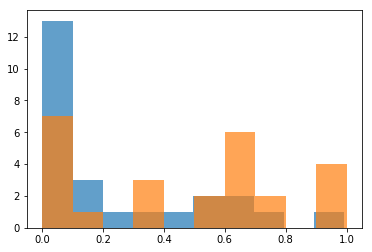

In [6]:
plt.hist(bla.IC,alpha=0.7)
plt.hist(bla.ICCT,alpha=0.7)

In [9]:
import scipy 

scipy.__version__

'1.0.0'